# 卷積

## 範例1. 使用程式計算卷積

In [1]:
import numpy as np

# 測試資料
source_map = np.array(list('1110001110001110011001100')).astype(np.int)
source_map = source_map.reshape(5,5)
print('原始資料：')
print(source_map)

# 濾波器(Filter)
filter1 = np.array(list('101010101')).astype(np.int).reshape(3,3)
print('\n濾波器:')
print(filter1)

原始資料：
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]

濾波器:
[[1 0 1]
 [0 1 0]
 [1 0 1]]


<ipython-input-1-664f971819a9>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  source_map = np.array(list('1110001110001110011001100')).astype(np.int)
<ipython-input-1-664f971819a9>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

In [2]:
# 計算卷積
# 初始化計算結果的矩陣
width = height = source_map.shape[0] - filter1.shape[0] + 1
result = np.zeros((width, height))

# 計算每一格
for i in range(width):
    for j in range(height):
        value1 =source_map[i:i+filter1.shape[0], j:j+filter1.shape[1]] * filter1
        result[i, j] = np.sum(value1)
print(result)

[[4. 3. 4.]
 [2. 4. 3.]
 [2. 3. 4.]]


In [3]:
# 使用 scipy 計算卷積
from scipy.signal import convolve2d

# convolve2d：二維卷積
convolve2d(source_map, filter1, mode='valid')

array([[4, 3, 4],
       [2, 4, 3],
       [2, 3, 4]])

## 定義卷積的影像轉換函數

In [4]:
# 卷積的影像轉換函數，padding='same'
from skimage.exposure import rescale_intensity

def convolve(image, kernel):
    # 取得圖像與濾波器的寬高
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # 計算 padding='same' 單邊所需的補零行數
    pad = int((kW - 1) / 2)
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    # 卷積
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]  # 裁切圖像
            k = (roi * kernel).sum()                               # 卷積計算
            output[y - pad, x - pad] = k                           # 更新計算結果的矩陣

    # 調整影像色彩深淺範圍至 (0, 255)
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    return output     # 回傳結果影像

## 灰階化(Gray)

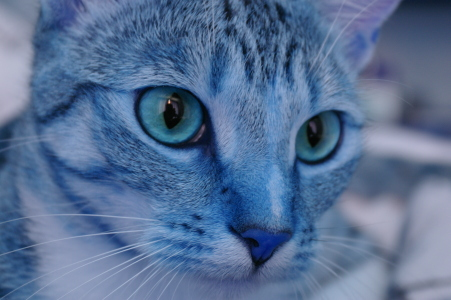

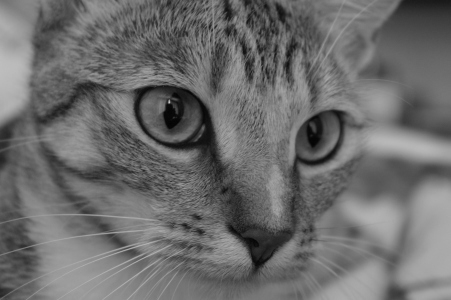

In [7]:
# pip install opencv-python
import skimage
import cv2

# 自 skimage 取得內建的圖像
from google.colab.patches import cv2_imshow

image = skimage.data.chelsea()
#cv2.imshow("original", image)
cv2_imshow(image)
# 灰階化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("gray", gray)
cv2_imshow(gray)
# 按 Enter 關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

## 模糊化(Blur)

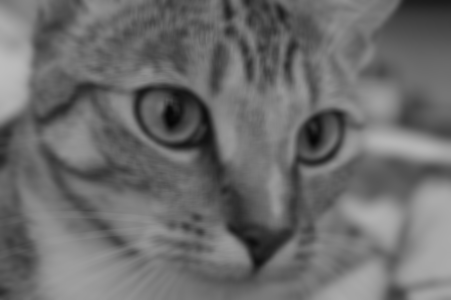

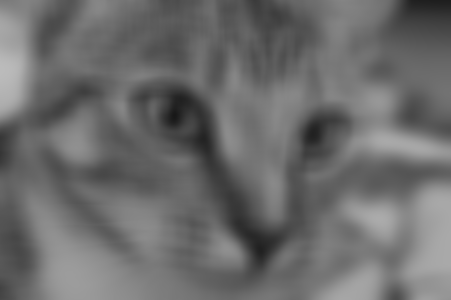

In [9]:
# 小模糊 filter
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))

# 卷積
convoleOutput = convolve(gray, smallBlur)
opencvOutput = cv2.filter2D(gray, -1, smallBlur)
#cv2.imshow("little Blur", convoleOutput)
cv2_imshow(convoleOutput)
# 大模糊
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# 卷積
convoleOutput = convolve(gray, largeBlur)
opencvOutput = cv2.filter2D(gray, -1, largeBlur)
#cv2.imshow("large Blur", convoleOutput)
cv2_imshow(convoleOutput)
# 按 Enter 關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

## 銳化(sharpen)

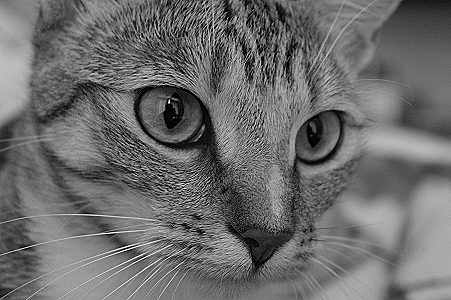

In [10]:
# sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# 卷積
convoleOutput = convolve(gray, sharpen)
opencvOutput = cv2.filter2D(gray, -1, sharpen)
#cv2.imshow("sharpen", convoleOutput)
cv2_imshow(convoleOutput)
# 按 Enter 關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

## Laplacian 邊緣偵測

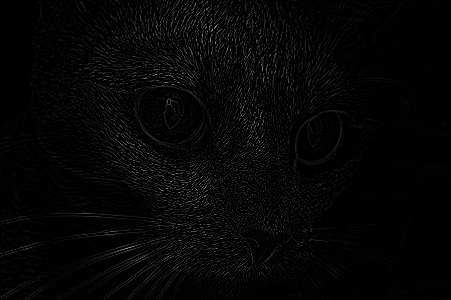

In [11]:
# Laplacian filter
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# 卷積
convoleOutput = convolve(gray, laplacian)
opencvOutput = cv2.filter2D(gray, -1, laplacian)
#cv2.imshow("laplacian edge detection", convoleOutput)
cv2_imshow(convoleOutput)
# 按 Enter 關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

## Sobel X軸邊緣偵測

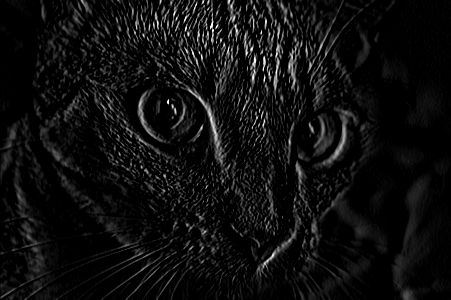

In [12]:
# Sobel x-axis filter
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# 卷積
convoleOutput = convolve(gray, sobelX)
opencvOutput = cv2.filter2D(gray, -1, sobelX)
#cv2.imshow("x-axis edge detection", convoleOutput)
cv2_imshow(convoleOutput)
# 按 Enter 關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

## Sobel Y軸邊緣偵測

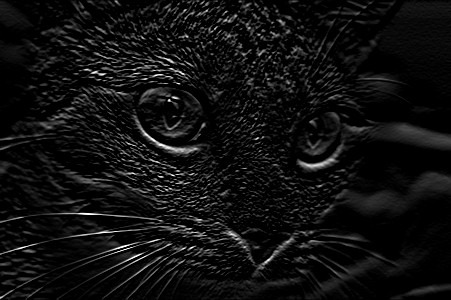

In [13]:
# Sobel y-axis filter
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

# 卷積
convoleOutput = convolve(gray, sobelY)
opencvOutput = cv2.filter2D(gray, -1, sobelY)
#cv2.imshow("y-axis edge detection", convoleOutput)
cv2_imshow(convoleOutput)
# 按 Enter 關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()